### Section 1. Introduction
This first section will explain briefly the data set and some characteristics of the problem.

This data set, named "Poker Hand Data Set", contains poker hands containing 5 cards (the same as "horse poker") and a class representing the value of the hand.

The data set doesn't have missing values, and all features are categorical nominal. However, they're all represented by integer values, so changing for a better representation is recommended.

In [1]:
# Imports
# Numpy, Pandas, OS, MatPlotLib
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Scikit-learn tools
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Scikit-learn classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

In [2]:
# Add column names, read the datasets
columns = ["c1s", "c1n", "c2s", "c2n", "c3s", "c3n", "c4s", "c4n", "c5s", "c5n", "r"]
poker_db_train = pd.read_csv('poker-hand-training-true.data', names=columns)
poker_db_test = pd.read_csv('poker-hand-testing.data', names=columns)

In [3]:
# Print size of the training and test datasets
print(poker_db_train.shape)
print(poker_db_test.shape)
print(poker_db_train['r'].value_counts())
print(poker_db_test['r'].value_counts())

(25010, 11)
(1000000, 11)
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: r, dtype: int64
0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: r, dtype: int64


In [4]:
# Separate classes from data sets
x_train = poker_db_train.drop('r', axis=1)
y_train = poker_db_train['r']
x_test  = poker_db_test.drop('r', axis=1)
y_test  = poker_db_test['r']

### Section 2. Raw simple test
On this section, I'll test the raw data set with some classification models. For each one, it'll be used the default configuration of each.

To store the results, a dict `result_sect2` will be created.

Classifiers used: K-NN, Gaussian Naive Bayes, two versions of SVM, Decision Tree, MLP.

In [6]:
result_sect2 = {}

In [45]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
result_sect2['knn'] = clf.score(x_test.iloc[0:1000], y_test.iloc[0:1000])

In [10]:
clf = GaussianNB()
clf.fit(x_train, y_train)
result_sect2['gaussian_nb'] = clf.score(x_test.iloc[0:1000], y_test.iloc[0:1000])

In [13]:
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)
result_sect2['svm'] = clf.score(x_test.iloc[0:1000], y_test.iloc[0:1000])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
clf = LinearSVC()
clf.fit(x_train, y_train)
result_sect2['linear_svm'] = clf.score(x_test.iloc[0:1000], y_test.iloc[0:1000])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
result_sect2['decision_tree'] = clf.score(x_test.iloc[0:1000], y_test.iloc[0:1000])

In [36]:
clf = MLPClassifier(max_iter=200)
clf.fit(x_train, y_train)
result_sect2['mlp'] = clf.score(x_test.iloc[0:1000], y_test.iloc[0:1000])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'knn': 0.554, 'gaussian_nb': 0.508, 'svm': 0.586, 'linear_svm': 0.489, 'decision_tree': 0.481, 'mlp': 0.657}


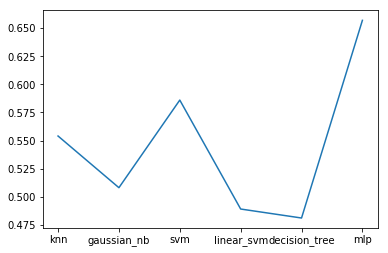

In [46]:
print(result_sect2)
x, y = zip(*result_sect2.items())
plt.plot(x, y)

### Section 3.

In this section I'll test the classifiers using a data set with one-hot encoding

In [7]:
result_sect3 = {}

In [5]:
enc = preprocessing.OneHotEncoder(categories='auto')
x_train_onehot = pd.DataFrame(enc.fit_transform(x_train).toarray())
x_test_onehot = pd.DataFrame(enc.fit_transform(x_test).toarray())

In [8]:
clf = KNeighborsClassifier()
clf.fit(x_train_onehot, y_train)
result_sect3['knn'] = clf.score(x_test_onehot.iloc[0:1000], y_test.iloc[0:1000])

In [9]:
clf = GaussianNB()
clf.fit(x_train_onehot, y_train)
result_sect3['gaussian_nb'] = clf.score(x_test_onehot.iloc[0:1000], y_test.iloc[0:1000])

In [10]:
clf = SVC(gamma='auto')
clf.fit(x_train_onehot, y_train)
result_sect3['svm'] = clf.score(x_test_onehot.iloc[0:1000], y_test.iloc[0:1000])

In [11]:
clf = LinearSVC()
clf.fit(x_train_onehot, y_train)
result_sect3['linear_svm'] = clf.score(x_test_onehot.iloc[0:1000], y_test.iloc[0:1000])

In [12]:
clf = DecisionTreeClassifier()
clf.fit(x_train_onehot, y_train)
result_sect3['decision_tree'] = clf.score(x_test_onehot.iloc[0:1000], y_test.iloc[0:1000])

In [13]:
clf = MLPClassifier(max_iter=200)
clf.fit(x_train_onehot, y_train)
result_sect3['mlp'] = clf.score(x_test_onehot.iloc[0:1000], y_test.iloc[0:1000])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'knn': 0.516, 'gaussian_nb': 0.032, 'svm': 0.508, 'linear_svm': 0.509, 'decision_tree': 0.577, 'mlp': 0.972}


<BarContainer object of 6 artists>

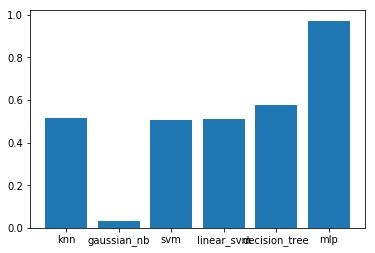

In [14]:
print(result_sect3)
x, y = zip(*result_sect3.items())
plt.bar(x, y)

# Rest of the owl

In [10]:
# Add weights to the data, so that numbers and suits have different values
def weightTransform(r, df, w, col_list):
    if w != 1:
        for i in col_list:
            if w == 1:
                r[i] = df[i]
            else:
                r[i] = df[i].transform(lambda x: x*w)

def weightedData(df, w1=1, w2=1):
    r = df.copy()
    weightTransform(r, df, w1, ['c1n', 'c2n', 'c3n', 'c4n', 'c5n'])
    weightTransform(r, df, w2, ['c1s', 'c2s', 'c3s', 'c4s', 'c5s'])
    return r

In [11]:
# K-NN wrapper function
def knn1(x_train, y_train, x_test, y_test, max_n = 10, p=2):
    result = []
    for i in range(1, max_n):
        clf = KNeighborsClassifier(n_neighbors=i, p=p)
        clf.fit(x_train, y_train)
        result.append(clf.score(x_test.iloc[0:1000], y_test.iloc[0:1000]))
    return result

In [ ]:
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf.fit(poker_db_train_x, poker_db_train_y)
    print(clf.score(poker_db_test_x.iloc[0:10000], poker_db_test_y.iloc[0:10000]))

In [ ]:
result = []
for i in range(1, 15):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(poker_db_train_x, poker_db_train_y)
    result.append(clf.score(poker_db_test_x.iloc[0:10000], poker_db_test_y.iloc[0:10000]))

In [ ]:
plt.plot(result)
plt.xlabel("Qt")
plt.ylabel("Result")

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(poker_db_train_x, poker_db_train_y)
prediction = clf.predict(poker_db_test_x)

In [ ]:
print(poker_db_test_y.value_counts())
cm = confusion_matrix(poker_db_test_y, prediction)
for i in range(0, 10):
    print(cm[i][i]/cm[i].sum())

In [ ]:
weightedData(x_train, 1.15, 9.123).head()

In [ ]:
x_test_w = x_test.copy()
for i in ['c1n', 'c2n', 'c3n', 'c4n', 'c5n']:
    x_test_w[i] = x_test[i].transform(lambda x: x/13*20)
for i in ['c1s', 'c2s', 'c3s', 'c4s', 'c5s']:
    x_test_w[i] = x_test[i].transform(lambda x: x/4*5)
print(x_test_w.head())

In [ ]:
fig, ax = plt.subplots()
for w in range(3, 10):
    result = knn1(weightedData(x_train, w, 1), y_train, weightedData(x_test, w, 1), y_test)
    print(result)
    ax.plot(result, label=w)
ax.legend()

In [ ]:
result = knn1(weightedData(x_train, 5, 1), y_train, weightedData(x_test, 5, 1), y_test)
print(result)
plt.plot(result, label='asd')

In [ ]:
fig, ax = plt.subplots()
ax.plot(result, label="asd")

ax.legend()

In [ ]:
knn1(x_train_w, y_train, x_test_w, y_test)

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(categories='auto')
x_train_onehot = pd.DataFrame(enc.fit_transform(x_train).toarray())
x_test_onehot = pd.DataFrame(enc.fit_transform(x_test).toarray())

In [ ]:
# Testing k-nn with the one-hot encoded data set
result = knn1(x_train_onehot, y_train, x_test_onehot, y_test)
print(result)
plt.plot(result)

In [ ]:
# Testing k-nn with the one-hot encoded data set, and a different distance calculator
result = knn1(x_train_onehot, y_train, x_test_onehot, y_test, p=1)
print(result)
plt.plot(result)

In [ ]:
# Sort training values based on the number, using the suit as tiebreaker
x_train_sorted = x_train.copy().sample(frac=1).reset_index(drop=True)
for i in range(0 , x_train_sorted.shape[0]):
    for j in range(0, 8, 2):        
        p = j
        while p >= 0 and (x_train_sorted.iloc[i][p+1] > x_train_sorted.iloc[i][p+3] or (x_train_sorted.iloc[i][p+1] == x_train_sorted.iloc[i][p+3] and x_train_sorted.iloc[i][p+0] > x_train_sorted.iloc[i][p+2])):
            aux = x_train_sorted.iloc[i][p+1]
            x_train_sorted.iloc[i][p+1] = x_train_sorted.iloc[i][p+3]
            x_train_sorted.iloc[i][p+3] = aux
            
            aux = x_train_sorted.iloc[i][p+0]
            x_train_sorted.iloc[i][p+0] = x_train_sorted.iloc[i][p+2]
            x_train_sorted.iloc[i][p+2] = aux
            p -= 2
            
x_train_sorted.head()

In [ ]:
# Sort test values based on the number, using the suit as tiebreaker
x_test_sorted = x_test.copy().sample(frac=1).reset_index(drop=True)
for i in range(0 , 10000):
    for j in range(0, 8, 2):        
        p = j
        while p >= 0 and (x_test_sorted.iloc[i][p+1] > x_test_sorted.iloc[i][p+3] or (x_test_sorted.iloc[i][p+1] == x_test_sorted.iloc[i][p+3] and x_test_sorted.iloc[i][p+0] > x_test_sorted.iloc[i][p+2])):
            aux = x_test_sorted.iloc[i][p+1]
            x_test_sorted.iloc[i][p+1] = x_test_sorted.iloc[i][p+3]
            x_test_sorted.iloc[i][p+3] = aux
            
            aux = x_test_sorted.iloc[i][p+0]
            x_test_sorted.iloc[i][p+0] = x_test_sorted.iloc[i][p+2]
            x_test_sorted.iloc[i][p+2] = aux
            p -= 2
            
x_test_sorted.head()

In [ ]:
# Testing k-nn with the sorted data sets
result = knn1(x_train_sorted, y_train, x_test_sorted, y_test)
print(result)
plt.plot(result)

In [ ]:
#Testing MLP

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(30,10), random_state=1, max_iter=1000)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

In [ ]:
for i in range(5, 50, 3):
    for j in range(5, 50, 3):
        clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(i,j), random_state=1, max_iter=1000)
        clf.fit(x_train, y_train)
        print("(%d %d): %f" % (i, j, clf.score(x_test[:1000], y_test[:1000])))

(5 5): 0.555000
(5 8): 0.571000
(5 11): 0.591000
(5 14): 0.577000
(5 17): 0.596000
(5 20): 0.631000
(5 23): 0.618000
(5 26): 0.689000
(5 29): 0.578000
(5 32): 0.617000
(5 35): 0.554000
(5 38): 0.575000
(5 41): 0.625000
(5 44): 0.664000
(5 47): 0.746000
(8 5): 0.559000
(8 8): 0.576000
(8 11): 0.550000
(8 14): 0.576000
(8 17): 0.560000
(8 20): 0.577000
(8 23): 0.656000
(8 26): 0.588000
(8 29): 0.684000
(8 32): 0.641000
(8 35): 0.620000
(8 38): 0.624000
(8 41): 0.818000
(8 44): 0.758000
(8 47): 0.700000
(11 5): 0.596000
(11 8): 0.587000
(11 11): 0.589000
(11 14): 0.627000
(11 17): 0.668000
(11 20): 0.689000
(11 23): 0.679000
(11 26): 0.662000
(11 29): 0.641000
(11 32): 0.689000
(11 35): 0.724000
(11 38): 0.740000
(11 41): 0.706000
(11 44): 0.829000
(11 47): 0.687000
(14 5): 0.607000
(14 8): 0.645000
(14 11): 0.615000
(14 14): 0.599000
(14 17): 0.727000
(14 20): 0.623000
(14 23): 0.689000
(14 26): 0.742000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(14 29): 0.854000
(14 32): 0.739000
(14 35): 0.777000
(14 38): 0.777000
(14 41): 0.668000
(14 44): 0.718000
(14 47): 0.728000
(17 5): 0.635000
(17 8): 0.577000
(17 11): 0.607000
(17 14): 0.677000
(17 17): 0.661000
(17 20): 0.728000
(17 23): 0.693000
(17 26): 0.777000
(17 29): 0.696000
(17 32): 0.700000
(17 35): 0.806000
(17 38): 0.914000
(17 41): 0.732000
(17 44): 0.759000
(17 47): 0.714000
(20 5): 0.644000
(20 8): 0.672000
(20 11): 0.610000
(20 14): 0.699000
(20 17): 0.703000
(20 20): 0.783000
(20 23): 0.894000
(20 26): 0.751000
(20 29): 0.726000
(20 32): 0.783000
(20 35): 0.836000
(20 38): 0.954000
(20 41): 0.985000
(20 44): 0.987000
(20 47): 0.902000
(23 5): 0.611000
(23 8): 0.591000
(23 11): 0.747000
(23 14): 0.760000
(23 17): 0.764000
(23 20): 0.777000
(23 23): 0.743000
(23 26): 0.759000
(23 29): 0.755000
(23 32): 0.842000
(23 35): 0.801000
(23 38): 0.764000
(23 41): 0.843000
(23 44): 0.879000
(23 47): 0.779000
(26 5): 0.720000
(26 8): 0.736000
(26 11): 0.708000
(26 14): 0.832000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(26 38): 0.957000
(26 41): 0.859000
(26 44): 0.862000
(26 47): 0.939000
(29 5): 0.677000
(29 8): 0.685000
(29 11): 0.784000
(29 14): 0.675000
(29 17): 0.784000
(29 20): 0.983000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(29 23): 0.960000
(29 26): 0.969000
(29 29): 0.799000
(29 32): 0.787000
(29 35): 0.847000
(29 38): 0.813000
(29 41): 0.838000
(29 44): 0.985000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(29 47): 0.970000
(32 5): 0.654000
(32 8): 0.705000
(32 11): 0.791000
(32 14): 0.750000
(32 17): 0.745000
(32 20): 0.779000
(32 23): 0.976000
(32 26): 0.934000
(32 29): 0.922000
(32 32): 0.985000
(32 35): 0.873000


In [13]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 5))
clf.fit(x_train, y_train)
print(clf.score(x_test[:1000], y_test[:1000]))

0.55
